In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the dataset
df = pd.read_csv("social_media_engagement_data.csv") 

# Convert timestamp column to datetime
df['Post Timestamp'] = pd.to_datetime(df['Post Timestamp'])

# Set the timestamp as index
df.set_index('Post Timestamp', inplace=True)

# Resample data (daily sum of engagement metrics)
df_resampled = df.resample('D').sum()

# Handle missing values (forward fill)
df_resampled.fillna(method='ffill', inplace=True)

# Display the first few rows
print(df_resampled.head())

                Likes  Comments  Shares  Impressions   Reach  Engagement Rate  \
Post Timestamp                                                                  
2021-03-08       9553      4324    1663        85963   51752           557.84   
2021-03-09      55180     23231    8844       481190  262953          3883.66   
2021-03-10      36395     19757    7709       414592  200740          3179.04   
2021-03-11      35480     19456    6654       431621  199155          3437.57   
2021-03-12      53205     26570   11317       612055  314509          4107.57   

                Audience Age  
Post Timestamp                
2021-03-08               688  
2021-03-09              3696  
2021-03-10              3179  
2021-03-11              2947  
2021-03-12              4369  


In [4]:
# Total memory usage of the DataFrame in MB
total_size_mb = df.memory_usage(deep=True).sum() / (1024 * 1024)  # Convert bytes to MB

# Number of rows and columns
num_rows, num_columns = df.shape

print(f"Total size of the database: {total_size_mb:.2f} MB")
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Total size of the database: 66.72 MB
Number of rows: 100000
Number of columns: 17


In [5]:
# Display column names
print("Column Names:")
print(df.columns.tolist())

Column Names:
['Platform', 'Post ID', 'Post Type', 'Post Content', 'Likes', 'Comments', 'Shares', 'Impressions', 'Reach', 'Engagement Rate', 'Audience Age', 'Audience Gender', 'Audience Location', 'Audience Interests', 'Campaign ID', 'Sentiment', 'Influencer ID']


In [10]:
# Drop the specified columns
df = df.drop(columns=['Post ID', 'Campaign ID', 'Influencer ID'])

# Verify the columns have been dropped
print("Updated DataFrame Columns:")
print(df.columns.tolist())

Updated DataFrame Columns:
['Platform', 'Post Type', 'Post Content', 'Likes', 'Comments', 'Shares', 'Impressions', 'Reach', 'Engagement Rate', 'Audience Age', 'Audience Gender', 'Audience Location', 'Audience Interests', 'Sentiment']


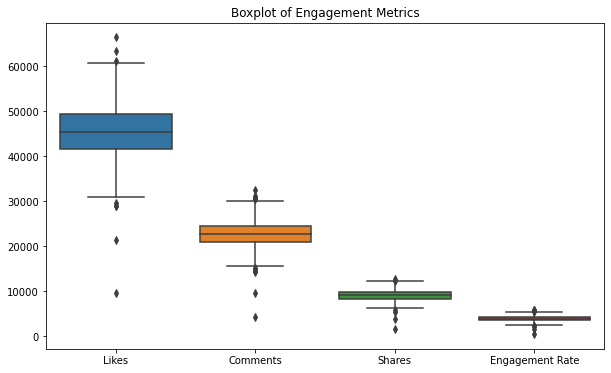

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_resampled[['Likes', 'Comments', 'Shares', 'Engagement Rate']])
plt.title("Boxplot of Engagement Metrics")
plt.show()

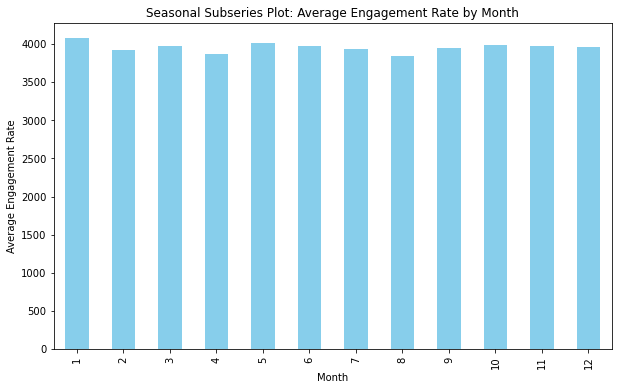

In [12]:
# Extract month and year from the index
df_resampled['Month'] = df_resampled.index.month

# Group by month and plot
monthly_engagement = df_resampled.groupby('Month')['Engagement Rate'].mean()

plt.figure(figsize=(10, 6))
monthly_engagement.plot(kind='bar', color='skyblue')
plt.xlabel("Month")
plt.ylabel("Average Engagement Rate")
plt.title("Seasonal Subseries Plot: Average Engagement Rate by Month")
plt.show()

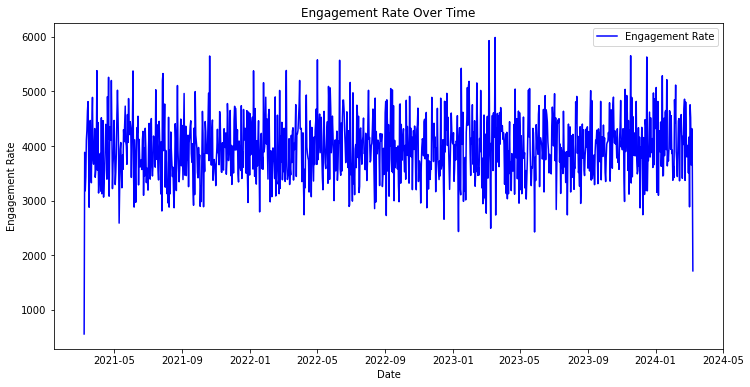

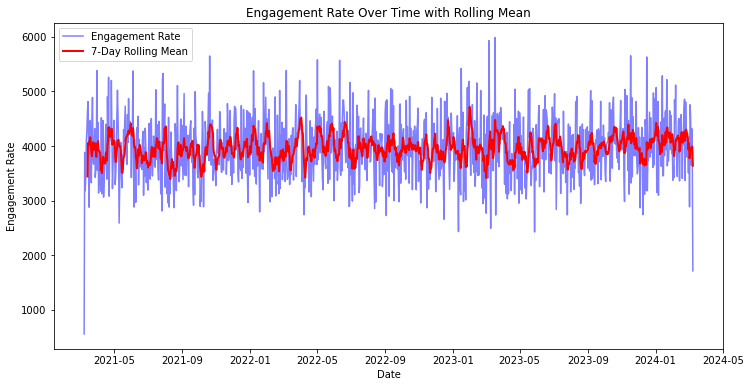

In [7]:
# Plot engagement trends over time
plt.figure(figsize=(12,6))
plt.plot(df_resampled.index, df_resampled['Engagement Rate'], label="Engagement Rate", color='blue')
plt.xlabel("Date")
plt.ylabel("Engagement Rate")
plt.title("Engagement Rate Over Time")
plt.legend()
plt.show()

# Calculate a 7-day rolling mean
df_resampled['Engagement Rate Smooth'] = df_resampled['Engagement Rate'].rolling(window=7).mean()

# Plot engagement trends over time with smoothed data
plt.figure(figsize=(12,6))
plt.plot(df_resampled.index, df_resampled['Engagement Rate'], label="Engagement Rate", color='blue', alpha=0.5)
plt.plot(df_resampled.index, df_resampled['Engagement Rate Smooth'], label="7-Day Rolling Mean", color='red', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Engagement Rate")
plt.title("Engagement Rate Over Time with Rolling Mean")
plt.legend()
plt.show()

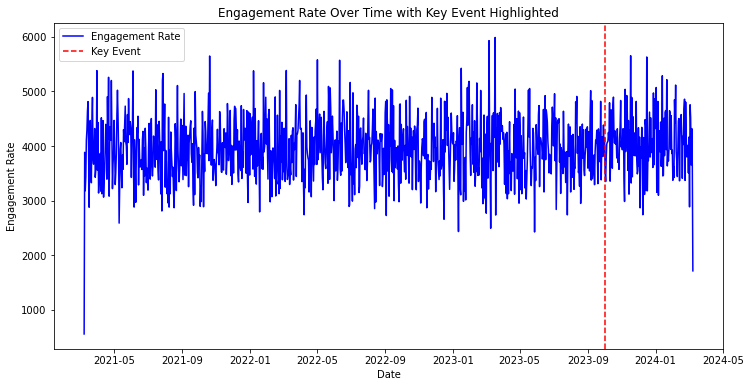

In [8]:
# Example: Highlight a specific date (replace with actual significant dates)
key_date = pd.to_datetime('2023-10-01')
plt.figure(figsize=(12,6))
plt.plot(df_resampled.index, df_resampled['Engagement Rate'], label="Engagement Rate", color='blue')
plt.axvline(x=key_date, color='red', linestyle='--', label="Key Event")
plt.xlabel("Date")
plt.ylabel("Engagement Rate")
plt.title("Engagement Rate Over Time with Key Event Highlighted")
plt.legend()
plt.show()

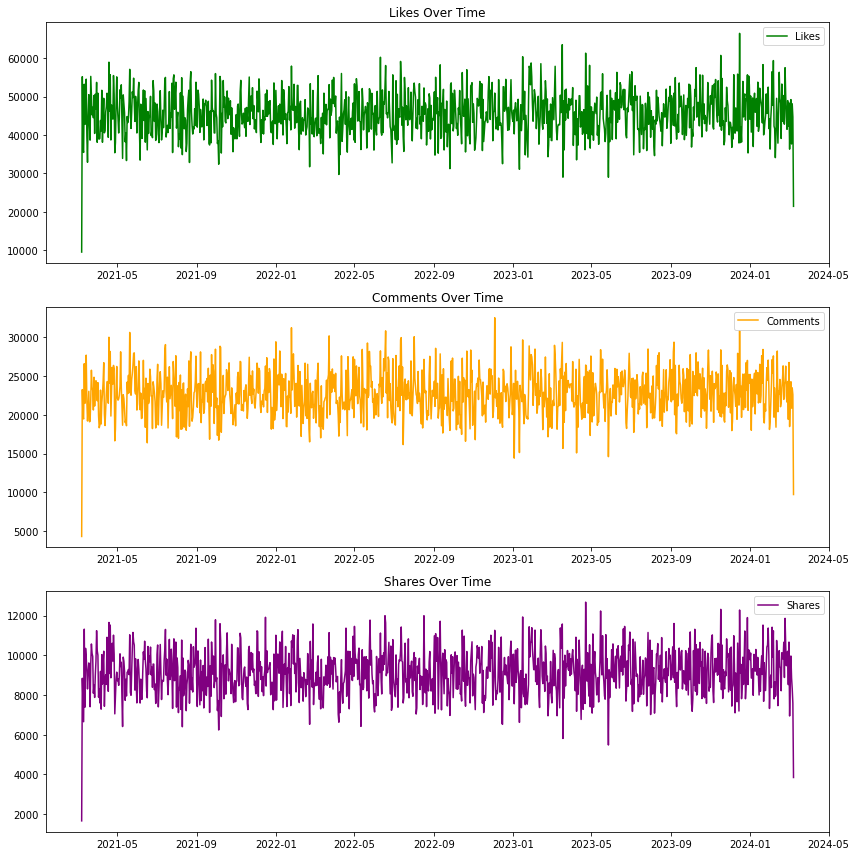

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Plot Likes
axes[0].plot(df_resampled.index, df_resampled['Likes'], label="Likes", color='green')
axes[0].set_title("Likes Over Time")
axes[0].legend()

# Plot Comments
axes[1].plot(df_resampled.index, df_resampled['Comments'], label="Comments", color='orange')
axes[1].set_title("Comments Over Time")
axes[1].legend()

# Plot Shares
axes[2].plot(df_resampled.index, df_resampled['Shares'], label="Shares", color='purple')
axes[2].set_title("Shares Over Time")
axes[2].legend()

plt.tight_layout()
plt.show()

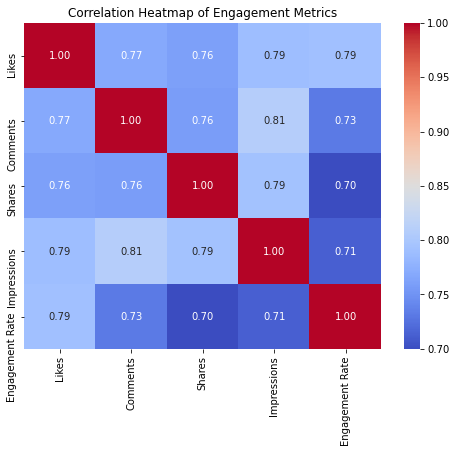

In [10]:
import seaborn as sns

# Calculate correlations
correlation_matrix = df_resampled[['Likes', 'Comments', 'Shares', 'Impressions', 'Engagement Rate']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Engagement Metrics")
plt.show()

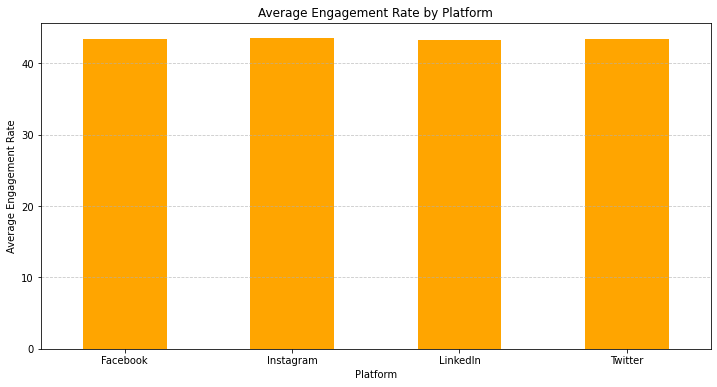

In [6]:
# Group by Platform and calculate mean engagement rate
engagement_by_platform = df.groupby('Platform')['Engagement Rate'].mean()

# Plot
engagement_by_platform.plot(kind='bar', color='orange', figsize=(12, 6))
plt.xlabel("Platform")
plt.ylabel("Average Engagement Rate")
plt.title("Average Engagement Rate by Platform")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

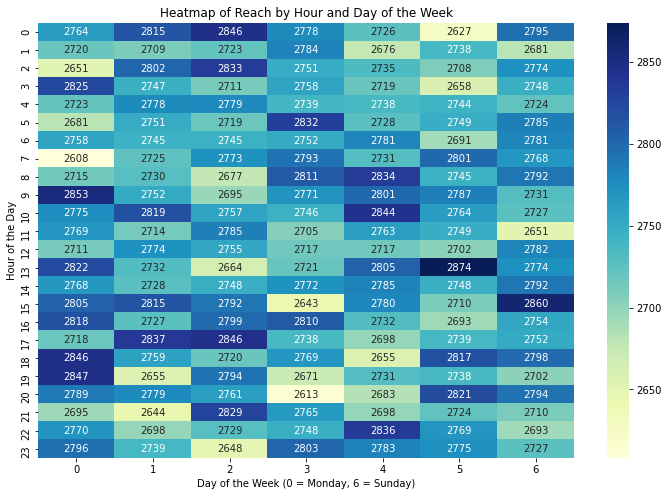

In [16]:
# Extract day of the week (0 = Monday, 6 = Sunday)
df['Post Day'] = df.index.dayofweek

# Group by hour and day, then calculate average reach
heatmap_data = df.groupby(['Post Hour', 'Post Day'])['Reach'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Heatmap of Reach by Hour and Day of the Week")
plt.xlabel("Day of the Week (0 = Monday, 6 = Sunday)")
plt.ylabel("Hour of the Day")
plt.show()

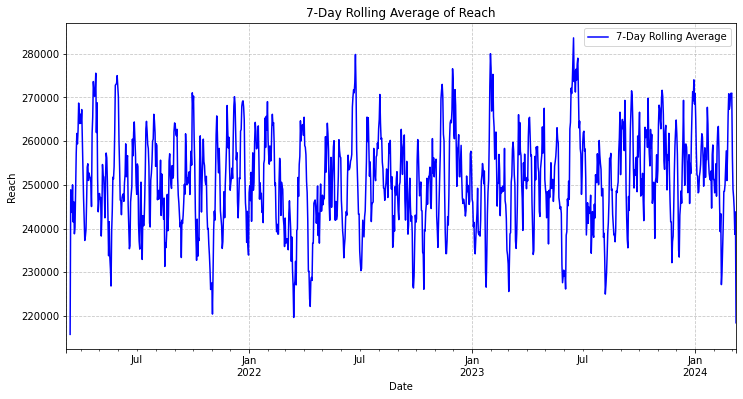

In [19]:
# Calculate 7-day rolling average for Reach
df_resampled['Reach_7D_Avg'] = df_resampled['Reach'].rolling(window=7).mean()

# Plot rolling average
plt.figure(figsize=(12, 6))
df_resampled['Reach_7D_Avg'].plot(color='blue', label='7-Day Rolling Average')
plt.title("7-Day Rolling Average of Reach")
plt.xlabel("Date")
plt.ylabel("Reach")
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()